In [246]:
import numpy as np
import pandas as pd
import seaborn  as sns

In [247]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23]) #دوازده عدد  که هرکدوم نشان دهنده ماه های سال به ترتیب از چپ به راست و اون اعداد تعداد نفراتی که از صد نفر  درمان شدن رو مشخص میکنه  
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])
#a شبه دارو هست و تاثیری نداره 
#b داروی اصلی هست و تاثیر دارد

In [248]:
a.mean()

np.float64(23.75)

In [249]:
b.mean()

np.float64(27.916666666666668)

In [250]:
d = b.mean() - a.mean()
d

np.float64(4.166666666666668)

In [251]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [252]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [253]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [254]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [255]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [256]:
np.random.shuffle(sales_t)

In [257]:
sales_t

array([[ 0., 23.],
       [ 0., 33.],
       [ 1., 32.],
       [ 1., 31.],
       [ 0., 18.],
       [ 0., 23.],
       [ 1., 27.],
       [ 0., 35.],
       [ 1., 24.],
       [ 1., 33.],
       [ 1., 29.],
       [ 0., 21.],
       [ 0., 19.],
       [ 1., 19.],
       [ 1., 41.],
       [ 0., 17.],
       [ 0., 27.],
       [ 1., 23.],
       [ 1., 32.],
       [ 0., 24.],
       [ 0., 24.],
       [ 0., 21.],
       [ 1., 28.],
       [ 1., 16.]])

In [258]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0], dtype=int32)

In [259]:
experiment_data = np.array([
    experiment_label,
    sales_t[:,1]
])
experiment_data

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [23., 33., 32., 31., 18., 23., 27., 35., 24., 33., 29., 21., 19.,
        19., 41., 17., 27., 23., 32., 24., 24., 21., 28., 16.]])

In [260]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0., 23.],
       [ 1., 33.],
       [ 0., 32.],
       [ 0., 31.],
       [ 1., 18.],
       [ 0., 23.],
       [ 0., 27.],
       [ 0., 35.],
       [ 1., 24.],
       [ 1., 33.],
       [ 1., 29.],
       [ 1., 21.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 41.],
       [ 1., 17.],
       [ 1., 27.],
       [ 0., 23.],
       [ 0., 32.],
       [ 1., 24.],
       [ 0., 24.],
       [ 0., 21.],
       [ 1., 28.],
       [ 0., 16.]])

In [261]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([33., 18., 24., 33., 29., 21., 19., 19., 41., 17., 27., 24., 28.])

In [262]:
experiment_data_t[experiment_data_t[:,0] == 0][:, 1]

array([23., 32., 31., 23., 27., 35., 23., 32., 24., 21., 16.])

In [263]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

np.float64(25.615384615384617)

In [264]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

np.float64(26.09090909090909)

In [265]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [266]:
e1 = sh_exp(1000)
e1

array([[ 1.31468531],
       [ 0.8       ],
       [-0.36363636],
       [-5.34265734],
       [ 4.72727273],
       [-3.72027972],
       [-0.36363636],
       [-2.65734266],
       [-1.68888889],
       [-2.11428571],
       [ 4.55944056],
       [-6.16666667],
       [ 4.22377622],
       [-0.4375    ],
       [-3.14285714],
       [ 0.45714286],
       [ 3.04895105],
       [-0.66666667],
       [ 4.85714286],
       [-3.31428571],
       [ 5.06293706],
       [ 3.66666667],
       [-0.02797203],
       [ 0.47552448],
       [ 0.4375    ],
       [ 0.66666667],
       [-4.68571429],
       [-1.        ],
       [ 0.5       ],
       [-0.47552448],
       [-2.33333333],
       [-5.5       ],
       [ 5.34265734],
       [ 2.5       ],
       [ 2.5625    ],
       [ 3.82222222],
       [ 0.8       ],
       [-0.64335664],
       [-2.65734266],
       [ 1.37062937],
       [ 1.98601399],
       [ 0.22857143],
       [-2.71328671],
       [ 2.17142857],
       [ 0.97902098],
       [-5

In [272]:
print(len(e1[e1 >= d]) / 10,'%')
#اگر عدد خروجی کمتر از  5 درصد باشد  یعنی شانس در اون دخیل نیست و اگر بالای 5 دردصد باشه ممکن است شانس دخیل باشه

5.3 %


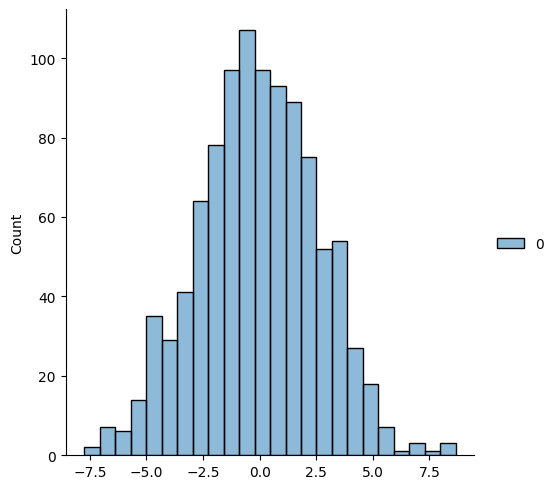

In [282]:
sns.displot(e1 , bins='auto')

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_14420\945836372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e1 , bins='auto')


<Axes: ylabel='Density'>

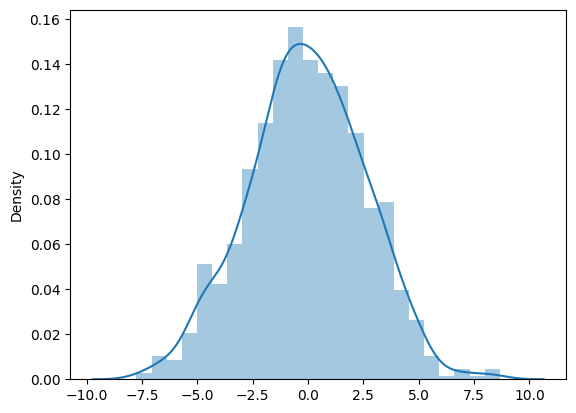

In [283]:
sns.distplot(e1 , bins='auto')